# Exploratory Data Analysis with Visualizations using taxi data

UCSD MSBA 23' Yujin Kim\
yujin.kim@rady.ucsd.edu


In [2]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import datetime

# get raw data
taxi = pd.read_csv('data/yellow_tripdata_2015-06_small.csv')  # 5% sub-sample 

# transformations for visualizations
taxi['pickupDateTime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['dropoffDateTime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])
taxi['tripDuration'] = (taxi['dropoffDateTime'] - taxi['pickupDateTime']).dt.total_seconds()/60
taxi['pickupDay'] = taxi['pickupDateTime'].dt.day
taxi['pickupDate'] = taxi['pickupDateTime'].dt.date
taxi['pickupHour'] = taxi['pickupDateTime'].dt.hour
taxi['weekDay'] = taxi['pickupDateTime'].dt.weekday
taxi['weekDay2'] = taxi['pickupDateTime'].dt.strftime('%A')
taxi['paymentType'] = taxi['payment_type'].map({1: 'Credit Card',
                                                2: 'Cash',
                                                3: 'No Charge',
                                                4: 'Other'})


In [20]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616247 entries, 0 to 616246
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   VendorID               616247 non-null  int64              
 1   tpep_pickup_datetime   616247 non-null  object             
 2   tpep_dropoff_datetime  616247 non-null  object             
 3   passenger_count        616247 non-null  int64              
 4   trip_distance          616247 non-null  float64            
 5   pickup_longitude       616247 non-null  float64            
 6   pickup_latitude        616247 non-null  float64            
 7   RateCodeID             616247 non-null  int64              
 8   store_and_fwd_flag     616247 non-null  object             
 9   dropoff_longitude      616247 non-null  float64            
 10  dropoff_latitude       616247 non-null  float64            
 11  payment_type           616247 non-null 

In [3]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,total_amount,pickupDateTime,dropoffDateTime,tripDuration,pickupDay,pickupDate,pickupHour,weekDay,weekDay2,paymentType
0,2,2015-06-12T16:51:09Z,2015-06-12T17:02:49Z,1,1.58,-73.970238,40.752396,1,N,-73.954735,...,11.76,2015-06-12 16:51:09+00:00,2015-06-12 17:02:49+00:00,11.666667,12,2015-06-12,16,4,Friday,Credit Card
1,1,2015-06-25T10:13:56Z,2015-06-25T10:36:35Z,1,5.30,-73.998344,40.756733,1,N,-73.922485,...,24.95,2015-06-25 10:13:56+00:00,2015-06-25 10:36:35+00:00,22.650000,25,2015-06-25,10,3,Thursday,Credit Card
2,2,2015-06-07T14:39:18Z,2015-06-07T14:58:07Z,5,4.47,-73.996407,40.720440,1,N,-73.991501,...,20.30,2015-06-07 14:39:18+00:00,2015-06-07 14:58:07+00:00,18.816667,7,2015-06-07,14,6,Sunday,Credit Card
3,2,2015-06-26T15:26:23Z,2015-06-26T15:36:12Z,1,0.88,-73.995941,40.744179,1,N,-74.003708,...,8.30,2015-06-26 15:26:23+00:00,2015-06-26 15:36:12+00:00,9.816667,26,2015-06-26,15,4,Friday,Cash
4,1,2015-06-22T05:03:54Z,2015-06-22T05:17:52Z,2,3.80,-73.990349,40.729000,1,N,-73.969559,...,15.80,2015-06-22 05:03:54+00:00,2015-06-22 05:17:52+00:00,13.966667,22,2015-06-22,5,0,Monday,Cash


In [4]:
taxi.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
VendorID,616247.0,1.52,0.50,1.00,1.00,2.00,2.00,2.00
passenger_count,616247.0,1.68,1.33,0.00,1.00,1.00,2.00,8.00
trip_distance,616247.0,3.07,38.51,0.00,1.01,1.74,3.22,30083.20
pickup_longitude,616247.0,-72.91,8.81,-85.68,-73.99,-73.98,-73.97,0.00
pickup_latitude,616247.0,40.16,4.85,0.00,40.74,40.75,40.77,56.27
RateCodeID,616247.0,1.04,0.59,1.00,1.00,1.00,1.00,99.00
dropoff_longitude,616247.0,-72.93,8.74,-81.43,-73.99,-73.98,-73.96,112.28
dropoff_latitude,616247.0,40.17,4.81,-16.18,40.73,40.75,40.77,46.89
payment_type,616247.0,1.38,0.50,1.00,1.00,1.00,2.00,4.00
fare_amount,616247.0,13.16,11.14,-170.00,6.50,9.50,15.00,603.00


## Exploration

Q. How many 'Cash' payment and what's the percentage of it?

In [27]:
count_c = taxi['paymentType'].tolist().count('Cash')
count_tt = len(taxi['paymentType'].tolist())
perc_c = (count_c/count_tt) * 100
print(f"The number of 'Cash' payment: {count_c}")
print(f"The percentage of 'Cash' payment in the customers: {perc_c:.2f}%")

The number of 'Cash' payment: 227517
The percentage of 'Cash' payment in the customers: 36.92%


In [28]:
# the count of unique values in the 'paymentType' column
ncust = taxi['paymentType'].value_counts()
ncust

Credit Card    385868
Cash           227517
No Charge        2153
Other             709
Name: paymentType, dtype: int64

Q. What proportion of paymentType? Practive lambda agg, apply

In [29]:
ncust.agg(lambda x: x/x.sum())

Credit Card    0.626158
Cash           0.369198
No Charge      0.003494
Other          0.001151
Name: paymentType, dtype: float64

Q. How many taxi rides were chared over $100? and what's the percentage of them?

In [33]:
# number of people who spend over $100 on 'book'

over100 = taxi['fare_amount'].agg(lambda x: x > 100).value_counts()
print(f"{over100[1]} of taxi rides were charged over $100")

394 of taxi rides were charged over $100


In [34]:
true_false_100 = taxi['fare_amount'].agg(lambda x: x > 100)
taxi_tt = len(true_false_100)
taxi_100_true = true_false_100.value_counts()[1]/len(true_false_100)
print(f"The percentage of people who spend over $100 on taxi ride: {taxi_100_true:.2%}")

The percentage of people who spend over $100 on taxi ride: 0.06%


Q. What's the percentage of tip amount over $10 per WeekDay2, and what's the min, max of tip amount?

In [37]:
taxi.groupby('weekDay2')['tip_amount'].agg([('one',['min','max']), \
    ('two',lambda tip_amount: 100 * ((tip_amount>10).sum()/tip_amount.sum()))])

one                two
             min     max tip_amount
weekDay2                           
Friday     -0.99   83.23   1.002400
Monday    -24.46  180.00   1.269913
Saturday    0.00  100.00   0.839985
Sunday     -1.26   90.00   0.993672
Thursday   -1.36   97.00   1.069274
Tuesday    -1.70  100.10   0.990722
Wednesday  -5.00  125.00   0.989975

Q. What's the average tip amount per weekDay2?

In [38]:
taxi.groupby(['weekDay2'])['tip_amount'].apply('mean')

weekDay2
Friday       1.803429
Monday       1.759657
Saturday     1.556899
Sunday       1.600166
Thursday     1.833369
Tuesday      1.758586
Wednesday    1.819661
Name: tip_amount, dtype: float64

Q. What's the correlation between fare amount and tip amount?

In [45]:
taxi[['fare_amount','tip_amount']].corr(method='pearson')

,fare_amount,tip_amount
fare_amount,1.000000,0.555908
tip_amount,0.555908,1.000000


Q. Which day made the highest total amount?

In [51]:
a = taxi.groupby('weekDay2')['total_amount'].sum()
aa = a.to_frame()
aa.rename(columns={0:'total_amount'}).sort_values(by=['total_amount'],ascending=False)

,total_amount
weekDay2,
Tuesday,1597143.23
Monday,1472035.36
Friday,1466213.35
Wednesday,1445818.44
Thursday,1441787.68
Saturday,1365803.01
Sunday,1278449.99


## Visualization 
### Taxi Pickups

Q. How many taxi pickups by day of month?

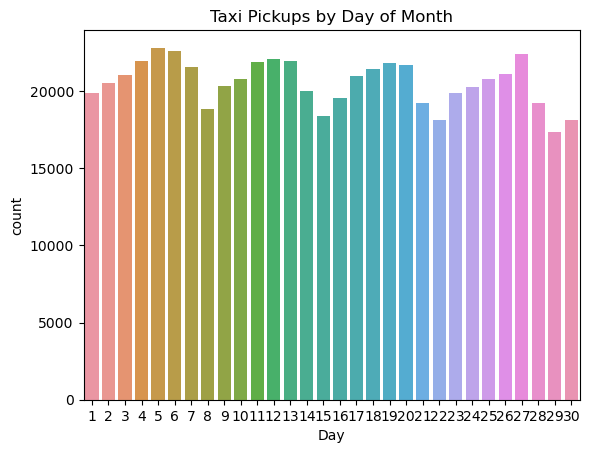

In [5]:
# basic bar plot
pl = sns.countplot(x='pickupDay', data=taxi)
pl.set(title='Taxi Pickups by Day of Month', xlabel = 'Day')
plt.show()

Q. Show 'Cash', 'Credit Card' payment type only among taxi puckups

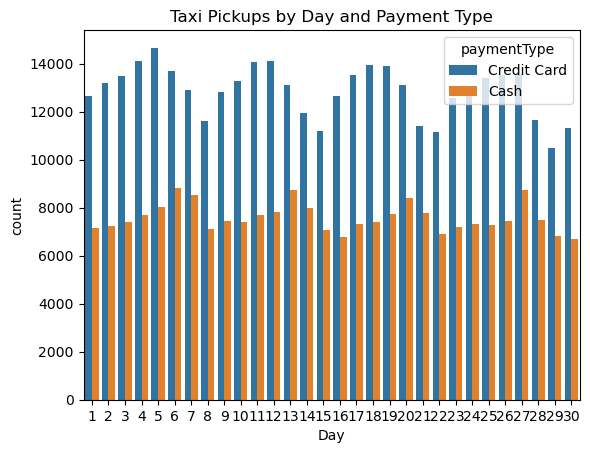

In [7]:
# basic bar plot - cash and credit card trips
paymentTypes = ['Credit Card','Cash']
pl = sns.countplot(x='pickupDay', data=taxi[taxi.paymentType.isin(paymentTypes)], 
              hue = 'paymentType')
pl.set(title='Taxi Pickups by Day and Payment Type', xlabel = 'Day')
plt.show()



Q. Sbow taxi pickups by hour of day, and payment type

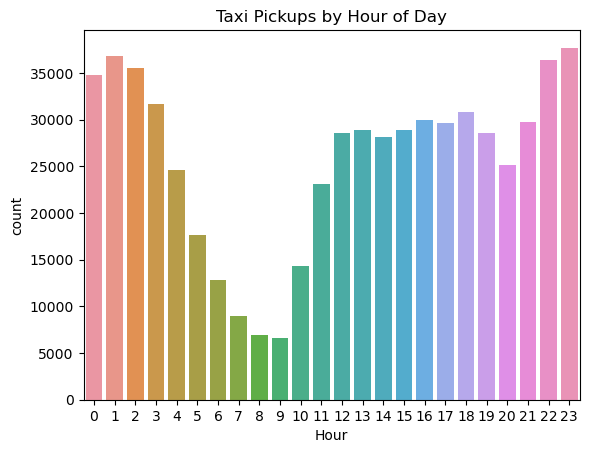

In [8]:
# hour of day
pl = sns.countplot(x='pickupHour', data=taxi)
pl.set(title='Taxi Pickups by Hour of Day', xlabel = 'Hour')
plt.show()


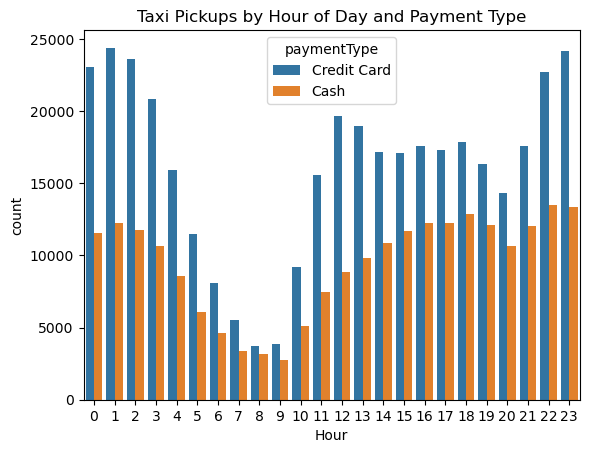

In [9]:
# hour of day and payment type 
pl = sns.countplot(x='pickupHour', data=taxi[taxi.paymentType.isin(paymentTypes)], 
              hue = 'paymentType')
pl.set(title='Taxi Pickups by Hour of Day and Payment Type', xlabel = 'Hour')
plt.show()

Q. Show average number of trips by weekday

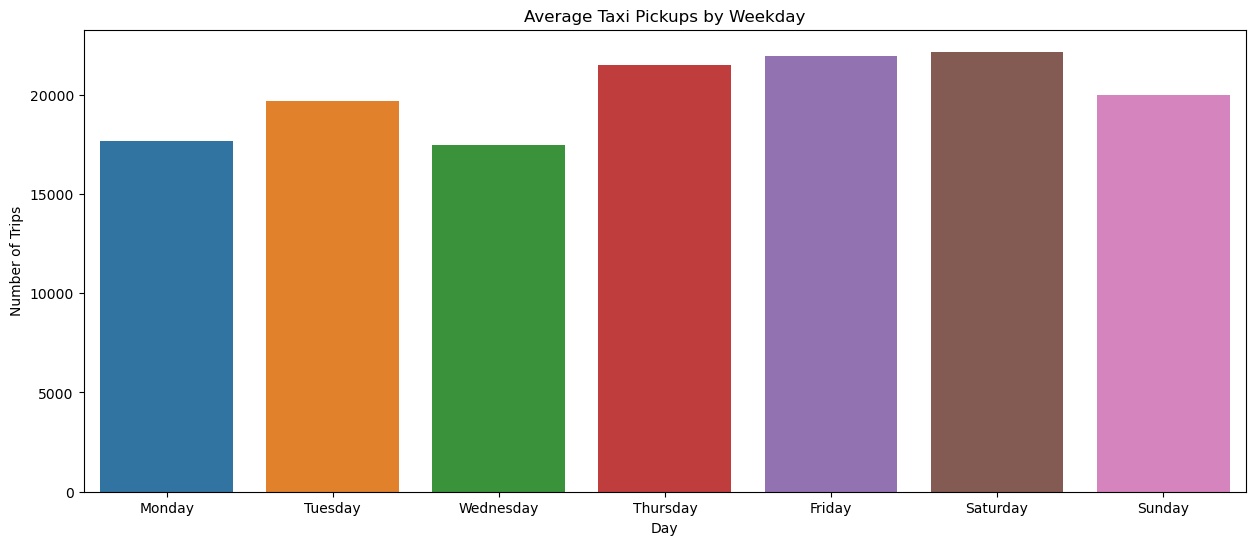

In [11]:
# average number of trips by weekday
df = taxi.pickupDate.value_counts().reset_index()
df['weekDay'] = pd.to_datetime(df['index']).dt.strftime('%A')

avgTrips = df.groupby(['weekDay'])['pickupDate'].mean().reset_index()

plt.figure(figsize=(15, 6))
pl = sns.barplot(x='weekDay', y = 'pickupDate', 
                  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                  data=avgTrips)
pl.set(title='Average Taxi Pickups by Weekday', xlabel = 'Day', ylabel = 'Number of Trips')
plt.show()

Q. Point plot with days of month and payment type

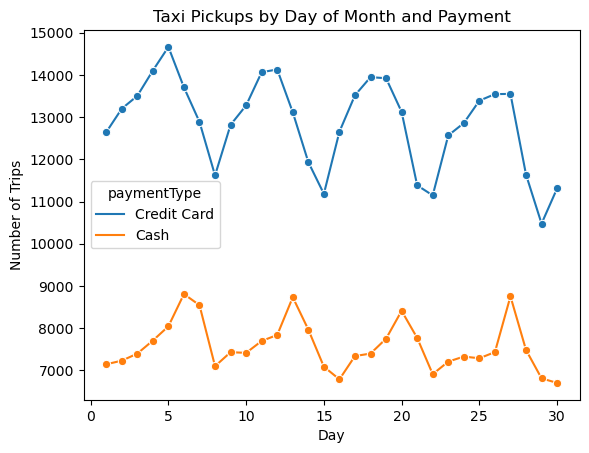

In [13]:
# point plot with days of month and payment type 
paymentTypes = ['Credit Card','Cash']
dayPaymentDF = taxi[taxi.paymentType.isin(paymentTypes)].value_counts(["pickupDay", "paymentType"]).reset_index(name="Count")

pl = sns.lineplot(x='pickupDay', y = 'Count', hue = 'paymentType',marker="o", data=dayPaymentDF)
pl.set(title='Taxi Pickups by Day of Month and Payment', xlabel = 'Day', ylabel = 'Number of Trips')
plt.show()

### Duration

Q. Show the trip duration

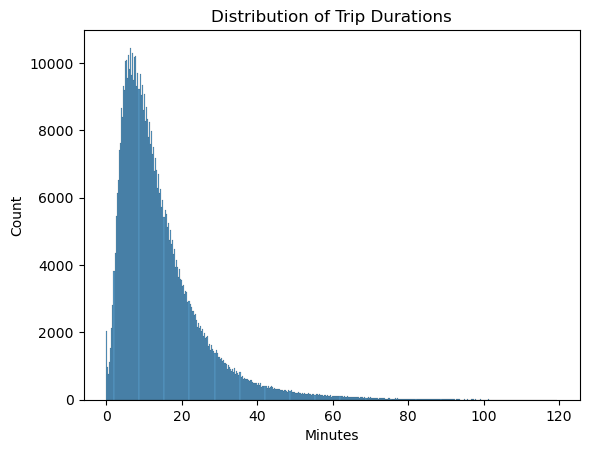

In [14]:
# histogram of durations
maxDur = 120   # trim extreme outliers from plot
pl = sns.histplot(data=taxi[(taxi.tripDuration <= maxDur) & (taxi.tripDuration > 0)], x='tripDuration')
pl.set(title='Distribution of Trip Durations', xlabel = 'Minutes')
plt.show()


Q. median duration by day of month

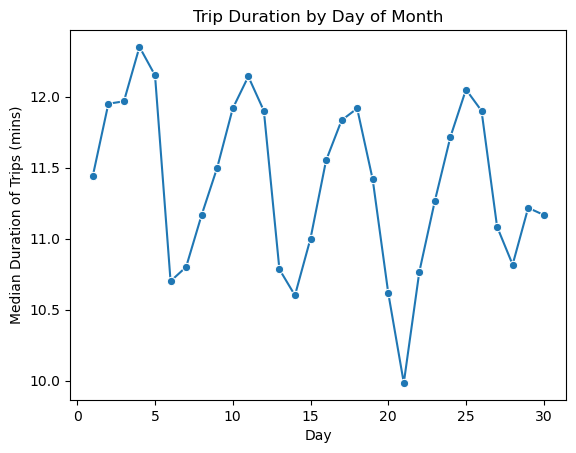

In [15]:
# median duration by day of month
durDay = taxi.groupby(['pickupDay'])['tripDuration'].median().reset_index()

pl = sns.lineplot(x='pickupDay', y = 'tripDuration', marker="o", data=durDay)
pl.set(title='Trip Duration by Day of Month', xlabel = 'Day', ylabel = 'Median Duration of Trips (mins)')
plt.show()


Q. duration by weekday

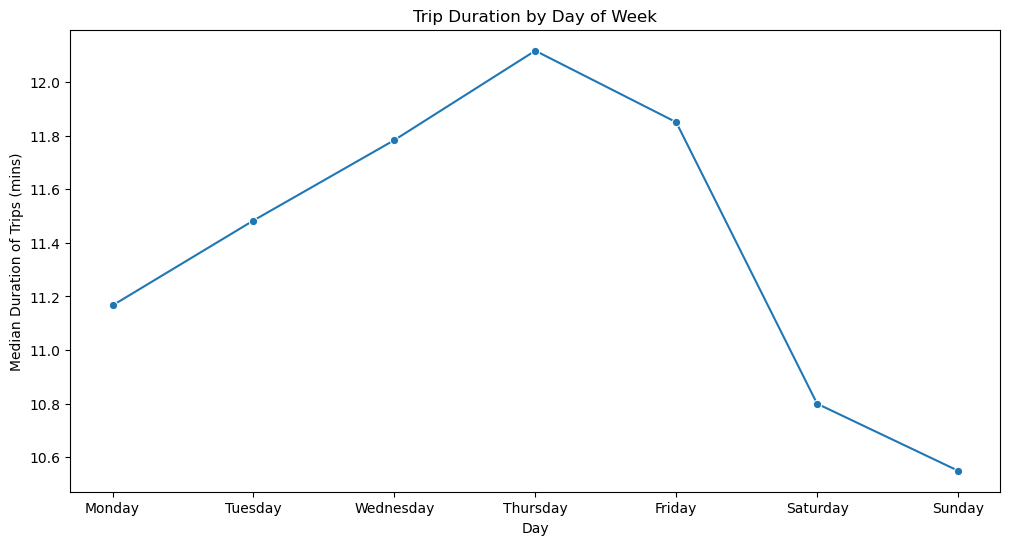

In [17]:
# duration by weekday

durDay = taxi.groupby(['weekDay2'])['tripDuration'].median().reset_index()

durDay['weekDay2'] = pd.Categorical(durDay['weekDay2'],
                                   categories=weekDayOrder,
                                   ordered=True)

plt.figure(figsize=(12, 6))
pl = sns.lineplot(x='weekDay2', y = 'tripDuration', marker="o", data=durDay)
pl.set(title='Trip Duration by Day of Week', xlabel = 'Day', ylabel = 'Median Duration of Trips (mins)')
plt.show()


Q. trip duration by weekday and hour of day

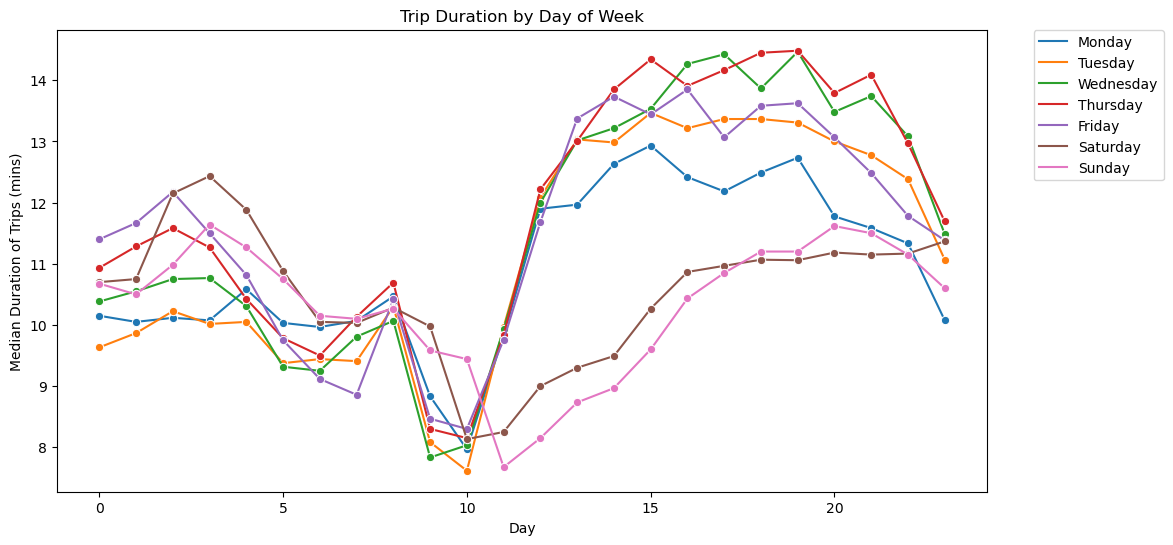

In [18]:
# trip duration by weekday and hour of day
durDayHour = taxi.groupby(['weekDay2','pickupHour'])['tripDuration'].median().reset_index()
durDayHour['weekDay2'] = pd.Categorical(durDayHour['weekDay2'],
                                   categories=weekDayOrder,
                                   ordered=True)

plt.figure(figsize=(12, 6))
pl = sns.lineplot(x='pickupHour', y = 'tripDuration', hue='weekDay2', marker="o", data=durDayHour)
pl.set(title='Trip Duration by Day of Week', xlabel = 'Day', ylabel = 'Median Duration of Trips (mins)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside plot area
plt.show()


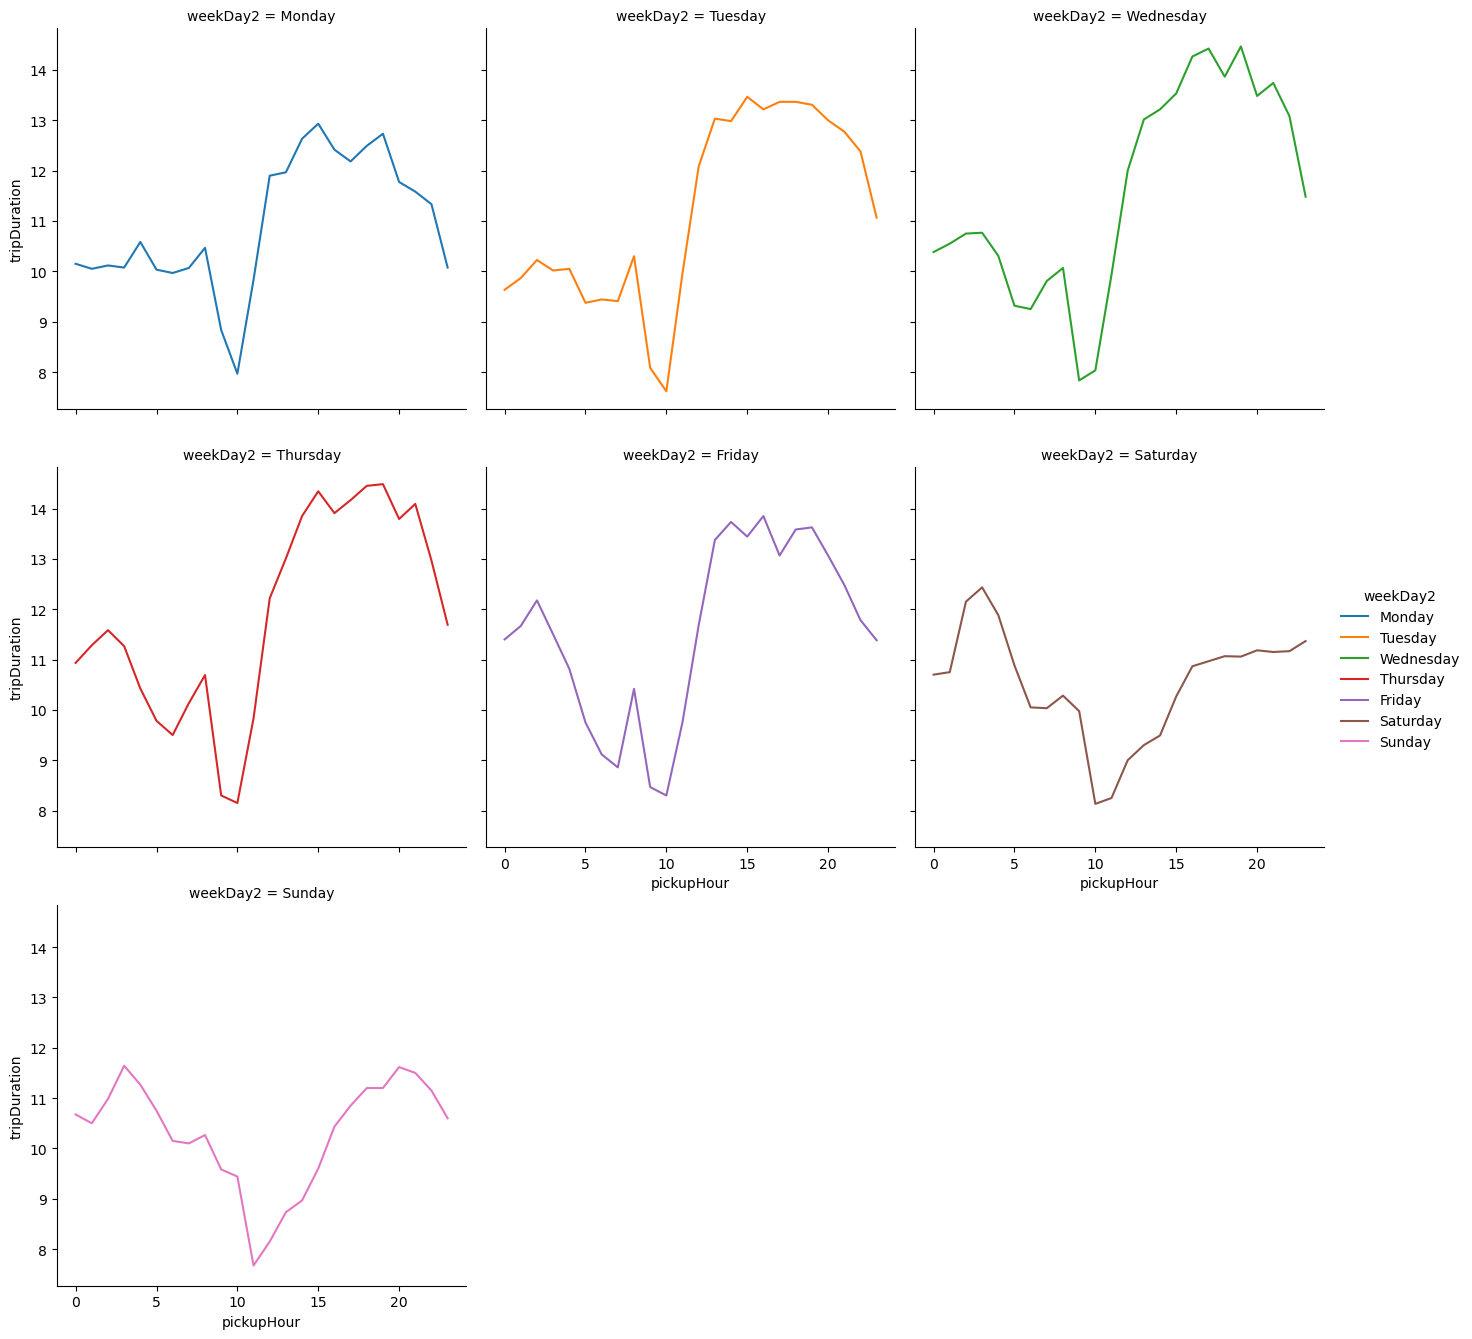

In [19]:
# alternative
g = sns.FacetGrid(durDayHour, hue="weekDay2", col="weekDay2",sharey=True,col_wrap=3,height=4.5, aspect=1)
g = g.map(sns.lineplot, "pickupHour", "tripDuration")
g.add_legend()

## Statistical analysis - Simple Linear Regression Model

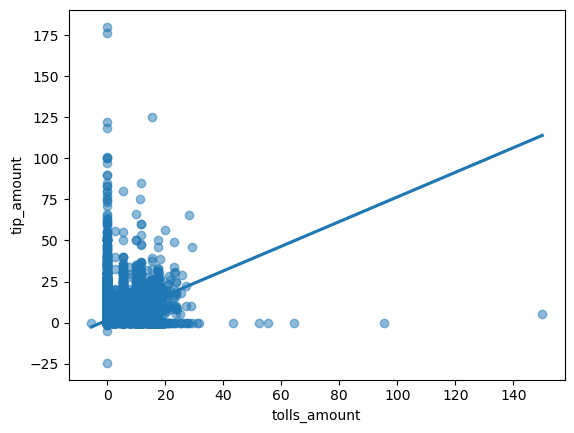

In [52]:
sns.regplot(x='tolls_amount',
            y='tip_amount',
            data = taxi,
            ci = None,
            scatter_kws={'alpha': 0.5})
plt.show()

In [56]:
# Import the ols function *coefficient
from statsmodels.formula.api import ols

# Create the model object
model1 = ols('trip_distance ~ tip_amount ', data=taxi)
# if you increase tip_amount by one, then the expected increase in trip_distance is 0.75. 

# Fit the model
model1 = model1.fit()

# Print the parameters of the fitted model
print(model1.params)
print(model1.summary())

* # The formula takes the form "response variable ~ explanatory variable".

Intercept     1.763835
tip_amount    0.750474
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          trip_distance   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1502.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:42:16   Log-Likelihood:            -3.1236e+06
No. Observations:              616247   AIC:                         6.247e+06
Df Residuals:                  616245   BIC:                         6.247e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

* Interpretation

The OLS linear regression model with "trip_distance" as the dependent variable and "tip_amount" as the independent variable. Here's how to interpret the key statistics:

The coefficient of "tip_amount" is 0.7505, which means that for a one-unit increase in "tip_amount", the expected increase in "trip_distance" is 0.7505, holding all other variables constant.

The intercept of the model is 1.7638, which represents the expected value of "trip_distance" when "tip_amount" is 0.

The R-squared value is 0.002, which means that only 0.2% of the variance in "trip_distance" is explained by "tip_amount" alone.

The F-statistic is 1502, with a corresponding p-value of 0.00, which indicates that the overall regression model is statistically significant.

The standard errors of the coefficients indicate the precision of the estimates. A smaller standard error implies a more precise estimate, and vice versa.

The t-statistic measures the significance of each coefficient, with a larger absolute t-value indicating a more significant relationship. In this case, both the intercept and "tip_amount" coefficients are statistically significant at the 0.05 level, as their p-values are below this threshold.

The Omnibus and Jarque-Bera tests are tests for normality of the residuals. In this case, both tests indicate severe departures from normality, which suggests that the model assumptions may not be met.

Overall, the results suggest that "tip_amount" alone may not be a strong predictor of "trip_distance", as the coefficient is relatively small and the R-squared value is very low. Additionally, the tests for normality of residuals suggest that the model assumptions may not be fully met, which could affect the reliability of the estimates. It may be useful to explore other variables or models to better predict "trip_distance".

In [54]:
a = ols("fare_amount ~ weekDay2 + 0", data=taxi).fit()
a.params
#coefficient Model without an intercept, Linear regression

weekDay2[Friday]       13.407875
weekDay2[Monday]       13.383196
weekDay2[Saturday]     12.610743
weekDay2[Sunday]       13.060490
weekDay2[Thursday]     13.436750
weekDay2[Tuesday]      13.010313
weekDay2[Wednesday]    13.247420
dtype: float64

In [59]:
# !jupyter nbconvert --to pdf EDA_taxi.ipynb

[NbConvertApp] Converting notebook EDA_taxi.ipynb to pdf
[NbConvertApp] Support files will be in EDA_taxi_files/
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Making directory ./EDA_taxi_files
[NbConvertApp] Writing 68432 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no c